# Possível resolução para as questões 4, 5 e 10, da lista 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest

## Questão 4

### Letra A
Mediana de V1 < Média de V1

In [2]:
np.random.seed(5)
v1 = np.random.normal(100, 10, 1000)

In [3]:
np.mean(v1) #média

100.33277027892855

In [4]:
np.median(v1) #mediana

100.23725604089765

### Letra B
Mediana de V2 > Média de V2

In [5]:
v2 = np.random.uniform(15, 100, 1000)

In [6]:
np.mean(v2) #média

58.16758666793251

In [7]:
np.median(v2) #mediana

58.345496586471384

## Questão 5

### Letra A

In [8]:
np.histogram(v1)

(array([  5,  18,  74, 193, 258, 249, 147,  38,  14,   4]),
 array([ 67.16084552,  74.05707948,  80.95331344,  87.8495474 ,
         94.74578136, 101.64201532, 108.53824928, 115.43448324,
        122.3307172 , 129.22695116, 136.12318512]))

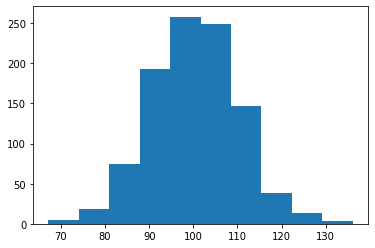

In [9]:
plt.hist(v1)
plt.show()

In [10]:
np.histogram(v2)

(array([ 90,  99, 106,  95, 104,  89, 103, 111, 107,  96]),
 array([15.04167179, 23.53635386, 32.03103593, 40.52571801, 49.02040008,
        57.51508215, 66.00976423, 74.5044463 , 82.99912837, 91.49381045,
        99.98849252]))

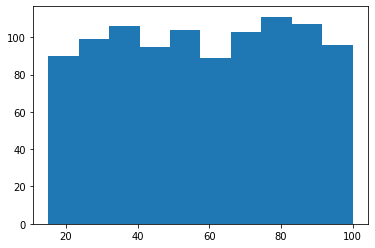

In [11]:
plt.hist(v2)
plt.show()

### Letra B

Definindo a significância do teste ($\alpha$)

In [12]:
significancia = 0.05 #padrão

Critério do valor $p$

Rejeitar $H_0$ se o valor $p$ < 0.05

In [13]:
stat_test, p_valor = normaltest(v1)

A função ```normaltest``` testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal

In [14]:
stat_test

2.3296514813602607

In [15]:
p_valor

0.3119770221998299

In [16]:
p_valor < significancia

False

Nesse caso, como o valor de $p$ não é menor que o valor da significância, a hipotése para a variável V1 não é rejeitada

In [17]:
stat_test, p_valor = normaltest(v2)

In [18]:
stat_test

820.4034782843545

In [19]:
p_valor

7.106376671742497e-179

In [20]:
p_valor < significancia

True

Nesse caso, como o valor de $p$ é menor que o valor da significância, a hipotése para a variável V2 é rejeitada

## Questão 10

Resolução proposta pelo aluno Eduardo Henrique

Número de vizinhos: 1  ---> F-measure: 0.89  ---- Cross validation: 0.96
Número de vizinhos: 2  ---> F-measure: 0.89  ---- Cross validation: 0.95
Número de vizinhos: 3  ---> F-measure: 0.92  ---- Cross validation: 0.97
Número de vizinhos: 4  ---> F-measure: 0.92  ---- Cross validation: 0.97
Número de vizinhos: 5  ---> F-measure: 0.95  ---- Cross validation: 0.97
Número de vizinhos: 6  ---> F-measure: 0.95  ---- Cross validation: 0.98
Número de vizinhos: 7  ---> F-measure: 0.97  ---- Cross validation: 0.98
Número de vizinhos: 8  ---> F-measure: 0.95  ---- Cross validation: 0.97
Número de vizinhos: 9  ---> F-measure: 0.97  ---- Cross validation: 0.97


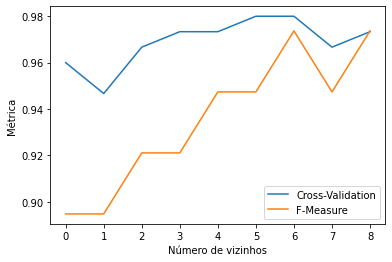

In [21]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from matplotlib import pyplot as plt

x, y = datasets.load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 20)
f = []
cross = []
for i in range(1,10):
  knn = KNeighborsClassifier(i).fit(x_train, y_train)
  y_predict =  knn.predict(x_test)

  f_measure_score = f1_score(y_test, y_predict, average = 'micro')
  cross_validation_score = cross_val_score(knn, x, y)
  f.append(f_measure_score)
  cross.append(cross_validation_score.mean())
  print("Número de vizinhos: %d"%(i)," ---> F-measure: %0.2f"%(f_measure_score), " ---- Cross validation: %0.2f"%(cross_validation_score.mean()))

plt.plot(range(9), cross, label = "Cross-Validation")
plt.plot(range(9), f, label='F-Measure')
plt.xlabel('Número de vizinhos')
plt.ylabel('Métrica')
plt.legend()
plt.show()

Links úteis para entender as questões:

[Considerações a respeito de média e mediana](https://www.somatematica.com.br/estat/basica/pagina6.php)

[Assimetria na estatística](https://www.greelane.com/pt/ci%C3%AAncia-tecnologia-matem%C3%A1tica/matem%C3%A1tica/what-is-skewness-in-statistics-3126242)

[Histograma](https://www.fm2s.com.br/histograma/#:~:text=Um%20histograma%20consiste%20em%20um,indicador%20de%20dispers%C3%A3o%20de%20processos.)

[Testes de hipóteses](https://www.alura.com.br/conteudo/estatistica-testes-hipotestes)

[Algoritmo KNN para classificação](https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/)

[Classificação usando KNN](http://www.sakurai.dev.br/classificacao-usando-knn/)

[Validação Cruzada](https://minerandodados.com.br/validacao-cruzada-aprenda-de-forma-simples-como-usar-essa-tecnica/#:~:text=A%20valida%C3%A7%C3%A3o%20cruzada%20%C3%A9%20uma,da%20modelagem%20%C3%A9%20a%20predi%C3%A7%C3%A3o)